In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

Given a 2D set of points spanned by axes $x$ and $y$ axes, we will try to fit a line that best approximates the data. The equation of the line, in slope-intercept form, is defined by: $y = mx + c$. 

In [49]:
def generate_random_points_along_a_line (slope, intercept, num_points, abs_value, abs_noise):
    # randomly select x
    x = np.random.uniform(-abs_value, abs_value, num_points)
    # y = mx + b + noise
    y = slope*x + intercept + np.random.uniform(-abs_noise, abs_noise, num_points)
    return x, y

def plot_points(x,y):
    plt.scatter(x, y)
    plt.title('Scatter plot of x and y')
    plt.xlabel('x')
    plt.ylabel('y')

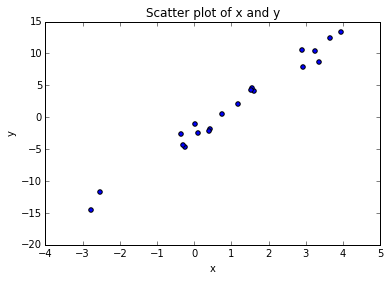

In [63]:
slope = 4
intercept = -3
num_points = 20
abs_value = 4
abs_noise = 2
x, y = generate_random_points_along_a_line (slope, intercept, num_points, abs_value, abs_noise)
plot_points(x, y)

$\frac{\partial C}{\partial m} = \sum_{i=0}^{N} -2(y-(mx+b)).x$

$\frac{\partial C}{\partial b} = \sum_{i=0}^{N} -2(y-(mx+b))$

In [64]:
# this function computes gradient with respect to slope m
def grad_m (x, y, m, b):
    return np.sum(np.multiply(-2*(y - (m*x + b)), x))

# this function computes gradient with respect to intercept b
def grad_b (x, y, m, b):
    return np.sum(-2*(y - (m*x + b)))

# Performs gradient descent
def gradient_descent (x, y, num_iterations, learning_rate):
    # Initialize m and b
    m = np.random.uniform(-1, 1, 1)
    b = np.random.uniform(-1, 1, 1)
    # Update m and b in direction opposite to that of the gradient to minimize loss 
    for i in range(num_iterations):
        m = m - learning_rate * grad_m (x, y, m, b)
        b = b - learning_rate * grad_b (x, y, m, b)
    # Return final slope and intercept
    return m, b

# Plot point along with the best fit line
def plot_line (m, b, x, y):
    plot_points(x,y)
    plt.plot(x, x*m + b, 'r')
    plt.show()

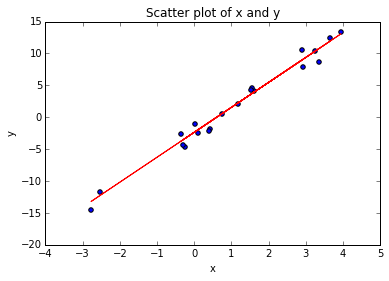

In [66]:
num_iterations =  1000
learning_rate = 0.0001
m, b = gradient_descent (x, y, num_iterations, learning_rate)
plot_line (m, b, x, y)
plt.show()